![FCT](https://www.acessolivre.pt/wp-content/uploads/2015/10/Imagem-UNL.jpg "FCT-UNL")

## SRCIM 19/20 - Predictive Maintenance 
### Problem Description

Unexpected downtime is one of the major cost drivers in several industries, making predictive maintenance an extremely appealing topic to explore. A recent [survey](https://news.thomasnet.com/companystory/downtime-costs-auto-industry-22k-minute-survey-481017) of manufacturers in the automotive industry indicates that downtime costs on average USD 22,000/minute, going as high as USD 50,000/minute in some cases.   

Therefore, observing the health and condition of equipment through sensors and telemetry data becomes crucial to enable predictive maintenance to be carried out for in-service equipment before critial failures occur. In this context, machine learning can be used to learn the complex relationships and patterns between sensor values and historical failure data in order to predict failures in the future. Examples of this could be the application of regression algorithms to predict the equipment's remaining useful life (RUL, the number of cycles remaining before failure), or classification algorithms to predict if a resource will faile within a specific time window (binary classification). This assignment will be focused on the latter. 

<img align="right" src="https://images.engineeringnet.eu/RSS/images/milling1151344.jpg" title="Source: [Online] https://images.engineeringnet.eu/RSS/images/milling1151344.jpg">
      
### Data:

The .csv files contain data related to equipment run-to-failure experiments, encompassing operational settings measurements from 20 different sensors. For the context of this problem it is assumed that an equipment's degradation pattern is reflected in its sensor measurements. 

### Requirements:

If you don't have a Python environment already configured in your machine it is recommended that you download and install Python 3.7 via the [Anaconda distribution](https://www.anaconda.com/distribution/).

**Packages:** *Pandas* and *Numpy* (data structures and manipulation), *Scikit-Learn* (Machine Learning), *Matplotlib* and *Seaborn* (visualization).

### Submission Guidelines and Deadline:
* Completed projects should be submitted by e-mail to **<ricardo.peres@uninova.pt>** before the end of the deadline.
* Projects should be executed in groups of 2 or 3 (maximum, no exceptions) students. Individual projects are allowed, but not encouraged.
* The project should be submitted as a **single .rar** file, named following the template **"*studentNumber1_studentNumber2_studentNumber3.rar*"** (e.g. *31444_31445_31446.rar*) containing:
   * The complete jupyter notebook contemplating the data analysis / machine learning part of the assignment. You can use the template provided in the CLIP platform which simultaneous serves as a guideline, project template and report.
   * Python project related to the REST API server.
* Deadline is **14 of December, 23:59 GMT**.

### Evaluation Criteria

All of the goal/value pairs listed below are based on the assumption that a correct implementation is submitted. 

Feel free to fill in the *Completed* column in accordance to your submission for the discussion (replace "*-*" with "*X*" when suitable).

| Goal                                                     | Value | Completed |
| :--------------------------------------------------------|:------|:----------: 
| 💾 Loading train/test data                               | 1     |     X      |
| 🏋️ Training **at least 3** different classifiers         | 5     |     X      |
| 💯 Evaluating each classifier using adequate metrics     | 4     |     X      |
| 📈 Plotting the results for comparison                   | 3     |     X      |
| 💰 Estimating the expected value                         | 2     |     X      |
| 💬 Discussing the results                                | 1     |     X      |
| 🖥️ Building a REST API to deploy and serve the best model | 2      |    X    |
| ❓  Additional bonus features                             | 2     |    NaN       |

Please refer to the lab staff for additional info regarding possible bonus features. Examples include for instance performing feature extraction on the original dataset to check if newly created features improve performance, tuning the models' hyper-parameters (please refer to the [documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) which includes several examples) to optimize performance, or complementing the model evaluation with a precision-recall analysis based on the classification thresholds.

### Lab Planning

* Lab 1 (08/11/19) - Intro and Data Ingestion
* Lab 2 (15/11/19) - Helper Functions 
* Lab 3 (22/11/19) - Binary Classifiers
* Lab 4 (29/11/19) - Expected Value Calculation and Discussion of Results
* Lab 5 (06/12/19) - REST API to serve the best model
* Lab 6 (13/12/19) - Bonus Features

---

### Handling Imports

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc,classification_report
import math


#classifiers
#Logistic Regression
from sklearn.linear_model import LogisticRegression as lr
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
#Random Forest , AdaBoost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#others
#from sklearn.naive_bayes import GaussianNB


from joblib import dump


#not in use we have the dataset split
#from sklearn.model_selection import train_test_split
#from sklearn import cross_validation

%matplotlib inline  

# ****************************************** TO DO **********************************************
# Complete with the imports from sklearn - relevant classification models, model_selection etc...
# ***********************************************************************************************

### Loading and preparing the dataset:

Suggested reference material: ["10 Minutes to Pandas"](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) from the Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/).

In [3]:
# ****************************************** TO DO **********************************************
# load the training data 
# - Use read_csv (pandas) to load data into a dataframe
# - Use the dataframe's head() to check the first few rows 
# ***********************************************************************************************
df_train = pd.read_csv('train.csv')
print('Head Train')
df_train.head()


Head Train


,id,cycle,setting1,setting2,s1,s2,s3,s4,s5,s6,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,label_bnc
0,1,1,100,-0.000525,389.0025,481.3650,1192.2750,1050.4500,10.965,16.2075,...,391.2450,1791.0150,6103.9650,6.314625,0.0225,294.00,1791,29.2950,17.564250,0
1,1,2,100,0.001425,389.0025,481.6125,1193.8650,1052.3550,10.965,16.2075,...,391.7100,1791.0525,6098.6175,6.323850,0.0225,294.00,1791,29.2500,17.567700,0
2,1,3,100,-0.003225,389.0025,481.7625,1190.9925,1053.1500,10.965,16.2075,...,391.8150,1791.0225,6099.9225,6.313350,0.0225,292.50,1791,29.2125,17.508150,0
3,1,4,100,0.000525,389.0025,481.7625,1187.0925,1051.4025,10.965,16.2075,...,392.1450,1791.0600,6100.3725,6.276150,0.0225,294.00,1791,29.1600,17.530425,0
4,1,5,100,-0.001425,389.0025,481.7775,1187.1375,1054.6650,10.965,16.2075,...,391.6425,1791.0300,6100.3500,6.322050,0.0225,294.75,1791,29.1750,17.553300,0


In [4]:
# ****************************************** TO DO **********************************************
# load test data, similar to the previous step
# ***********************************************************************************************
df_test = pd.read_csv('test.csv')
print('Head test')
df_test.head()

Head test


,id,cycle,setting1,setting2,s1,s2,s3,s4,s5,s6,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,label_bnc
0,1,31,100,-0.000450,389.0025,481.9350,1185.9150,1049.1825,10.965,16.2075,...,391.3425,1791.0450,6097.5825,6.301800,0.0225,294.75,1791,29.1075,17.516400,0
1,2,49,100,0.001350,389.0025,481.9125,1189.9425,1058.1225,10.965,16.2075,...,391.3050,1791.0675,6095.1750,6.337875,0.0225,293.25,1791,29.1075,17.446350,0
2,3,126,100,-0.001200,389.0025,482.1600,1192.3125,1064.1675,10.965,16.2075,...,390.6225,1791.1050,6098.5950,6.308925,0.0225,296.25,1791,29.1975,17.455500,0
3,4,106,100,0.000900,389.0025,482.0850,1195.8975,1055.1600,10.965,16.2075,...,391.4100,1791.0825,6100.2300,6.347550,0.0225,296.25,1791,28.9350,17.443575,0
4,5,98,100,-0.000975,389.0025,481.7025,1192.4550,1064.5200,10.965,16.2075,...,390.7500,1791.1125,6094.3050,6.327150,0.0225,295.50,1791,29.0625,17.558775,0


In [5]:
# ****************************************** TO DO **********************************************
# Split the dataset into X_train, X_test, y_train, y_test
# Don't forget to remove the id and the cycle from the features
# ***********************************************************************************************
# X_train is the s the features we want to use
x_train = df_train.iloc[:,2:-1]
# Y_train is the label that we want to predict
y_train = df_train.iloc[:,-1]

x_test = df_test.iloc[:,2:-1]
y_test = df_test.iloc[:,-1]


### Binary Classification:

Suggested reference material: Scikit-Learn's [documentation](https://scikit-learn.org/stable/documentation.html) which includes [tutorials](https://scikit-learn.org/stable/tutorial/index.html) and a [quick-start guide](https://scikit-learn.org/stable/tutorial/basic/tutorial.html). 

#### Some notes regarding the Confusion Matrix for binary classification:
* True Positive (TP) → Correctly classified as *1*
* True Negative (TN) → Correctly classified as *0*
* False Positive (FP) → *Type I error* → *0* classified as a *1* (e.g. Healthy equipment flagged as needing maintenance)
* False Negative (FN) → *Type II error* → *1* classified as a *0* (e.g. Faulty equipment flagged as not needing maintenance)

|  <div style="width:200px">True Positive Rate (Recall)</div> | <div style="width:200px">True Negative Rate</div> | <div style="width:200px">False Negative Rate</div>  | <div style="width:200px">False Positive Rate</div> |
|:------------------:|:--------------------:|:---------------------:|:-------------------:|
| $TPR = \frac{TP}{TP+FN} = 1 - FNR$ | $TNR = \frac{TN}{TN+FP} = 1 - FPR$ | $FNR = \frac{FN}{FN+TP} = 1 - TPR$ | $FPR = \frac{FP}{FP+TN} = 1 - TNR$ |


25=TP+FN 75=TN+FP df['TP']= 25.DF['TPR']
Using Scikit-Learn, the confusion matrix can be obtained via `sklearn.metrics`, returning each metric in the following order:

`tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()`

This corresponds to the confusion matrix, with *rows* and *columns* representing the *actual* and *predicted* values, respectively:

|     |  0  |  1  |
|:---:|:---:|:---:|
|  0  |  TN | FP  |
|  1  |  FN | TP  |

#### Helper Functions
Before the training stage, let us define a couple of helper functions to later evaluate our models.

In [6]:
def get_y_score(classifier, X_test, y_pred):
    """Get the predicted scores from the series of predicted values for a given classifier.  

    Args:
        classifier: The trained model for classification
        X_test (series): Contains the values of the features in the test set
        y_pred (series): Contains the predicted values for the test set
        
    Returns:
        y_score (series): The predicted scores
        
    """
    if hasattr(classifier, 'predict_proba'):   
        y_score = classifier.predict_proba(X_test)[:,1]
    elif hasattr(classifier, 'decision_function'):
        y_score = classifier.decision_function(X_test)
    else:
        y_score = y_pred 
    return y_score

In [7]:
def get_maintenance_capacity_per_threshold(thresh_list,y_score):
    """Get the required maintenance capacity that is estimated for each threshold of the ROC curve.  
   Maintenance capacity can be seen as a % of equipment foreseen to require maintenance per period.
   
    Args:
        thresh_list (series): Contains the threshold values from the ROC curve
        
    Returns:
        capacity_roc (series): Contains the maintenance capacity for each threshold 
        
    """
    capacity_roc = []  
    for thr in thresh_list:
        capacity_roc.append((y_score >= thr).mean())
    capacity_roc = np.array(capacity_roc)
    return capacity_roc

For the *plot_roc_auc_and_thresholds* function you'll find an example [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html). Don't forget that you need at least two different plots, one for the ROC curve and the other for the thresholds (x axis) and their corresponding FPR/TPR/Capacity (y axis).

In [8]:
# ****************************************** TO DO **********************************************
# Implement the plot_roc_auc_and_thresholds funtion to visualize the evaluation results.
# Suggestion: Leave this step for the end of the bin_class_metrics implementation.
# ***********************************************************************************************
def plot_roc_auc_and_thresholds(fpr, tpr, roc_auc, thresh_roc, capacity_roc,model):  
    # ROC CURVE
    print('Graph ROC Curve for '+ model)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    #

    print('Graph Thresholds for '+ model)

    plt.figure()
    lw = 2
    plt.plot(thresh_roc,capacity_roc, color='red',
         lw=lw, label='Capacity')
    plt.plot(thresh_roc,fpr ,color='blue',
         lw=lw, label='FPR')
    plt.plot(thresh_roc,tpr ,color='green',
         lw=lw, label='TPR')
    #plt.xlim([0.0, len(thresh_roc)])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Thresholds')
    plt.ylabel('TPR/FPR/Capacity')
    plt.title('Thresholds')
    plt.legend(loc="lower right")
    plt.show()
    
    

In [9]:
# ****************************************** TO DO **********************************************
# Implement the bin_class_metrics funtion
# ***********************************************************************************************
def binary_class_metrics(model, y_test, y_pred, y_score):
    
    """Calculate main binary classifcation metrics, plot AUC ROC and Precision-Recall curves.
    
    Args:
        model (str): The model name identifier
        y_test (series): Contains the test label values
        y_pred (series): Contains the predicted values
        y_score (series): Contains the predicted scores
        
    Returns:
        dataframe: The combined metrics in single dataframe
        dataframe: ROC thresholds

        Plot: AUC ROC
        plot: TPR-FPR threshold
        
    """
      
    # ****************************************** TO DO **********************************************
    # Build a dictionary for each metric and calculate its value using the corresponding
    # sklearn.metrics call. Build a pandas dataframe from the dict using pd.DataFrame.from_dict
    # ***********************************************************************************************
    binclass_metrics = {
                        
                        'Accuracy' :accuracy_score( y_test,y_pred) ,
                        'Precision' : precision_score( y_test,y_pred,average='binary'),
                        'Recall' : recall_score( y_test,y_pred,average='binary'),
                        'F1 Score' : f1_score( y_test,y_pred,average='binary'),
                        'ROC AUC' : roc_auc_score( y_test,y_score),#?
                       }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics,orient='index')
    df_metrics.columns = [model]  

    # ****************************************** TO DO **********************************************
    # Get the FPR, TPR and Threshold for each point in the ROC curve using metrics.roc_curve
    # Afterwards, use metrics.auc to calculate the roc_auc metric from the FPR and TPR
    # ***********************************************************************************************

    #fpr-false positive rate , tpr true positive rate
    
    fpr, tpr, thresh_roc = roc_curve(y_test, y_score)
    roc_auc = auc(fpr,tpr)
    
    # ****************************************** TO DO **********************************************
    # Calculate the required maintenance capacity for each threshold level using the helper function
    # ***********************************************************************************************
    capacity_roc = get_maintenance_capacity_per_threshold(thresh_roc,y_score)

    roc_thresh = {
                    'Threshold' : thresh_roc,
                    'TPR' : tpr,
                    'FPR' : fpr,
                    'Capacity' : capacity_roc
                 }
    
    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)
    
    
    # ****************************************** TO DO **********************************************
    # Calculate the remaining classification metrics: TP, FP, TN, FN, TNR, FNR
    # Keep in mind that from the test dataset file we can conclude:
    #     - Number of samples from the positive class = 25 => TP + FN = 25
    #     - Number of samples from the negative class = 75 => TN + FP = 75
    # ***********************************************************************************************
    
    #25=TP+FN 75=TN+FP df['TP']= 25.DF['TPR']
    #𝑇𝑃𝑅=𝑇𝑃𝑇𝑃+𝐹𝑁   =1−𝐹𝑁𝑅  𝑇𝑁𝑅=𝑇𝑁/𝑇𝑁+𝐹𝑃=1−𝐹𝑃𝑅  𝐹𝑁𝑅=𝐹𝑁/𝐹𝑁+𝑇𝑃=1−𝑇𝑃𝑅  𝐹𝑃𝑅=𝐹𝑃/𝐹𝑃+𝑇𝑁=1−𝑇𝑁𝑅

    
    df_roc_thresh['TN'] = 75*(1-roc_thresh['FPR'])

    df_roc_thresh['FP'] = 75*roc_thresh['FPR']
    df_roc_thresh['FN'] = 25*(1-roc_thresh['TPR'])
    df_roc_thresh['TP'] = 25*roc_thresh['TPR']
    
    df_roc_thresh['TNR'] = (1-fpr)
    df_roc_thresh['FNR'] = (1-tpr)
    
    df_roc_thresh['Model'] = model
    
    # ****************************************** TO DO **********************************************
    # Print the evaluation results (the model's name, the confusion matrix, the 
    # classification report, the dataframe with bin_class_metrics and the dataframe with the roc metrics).
    #
    # References:
    # metrics.confusion_matrix
    # metrics.classification_report -> precision, recall, f1-score and support per label + averages
    # ***********************************************************************************************

    #confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    clf_report =  classification_report(y_test, y_pred)

    # ****************************************** TO DO **********************************************
    # Plot the roc_auc and threshold curves (2 plots) using the plot_roc_auc_and_thresholds function. 
    # ***********************************************************************************************
    
    plot_roc_auc_and_thresholds(fpr, tpr, roc_auc, thresh_roc, capacity_roc,model)
    

    # podemos tambem returnar a cm pode ser util no fim
    return  df_metrics, df_roc_thresh

#### Models
Let us train and evaluate different classification models for this problem.

<img align="right" width="50%" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png" title="Source: [Online] https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png">

Candidates can include:
* Logistic Regression
* K-Nearest Neighbours
* Decision Tree
* Random Forest
* AdaBoost
* Others... Example of different classifiers can be found [here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).



Graph ROC Curve for Logistic Regression


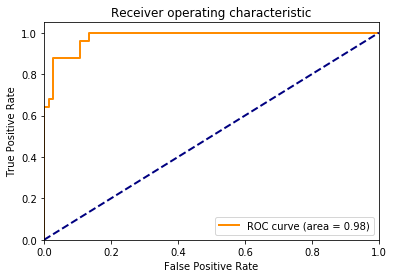

Graph Thresholds for Logistic Regression


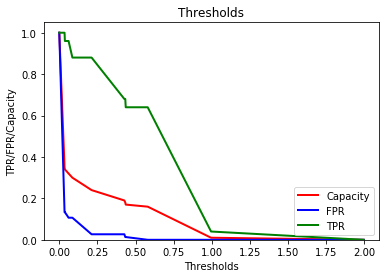

Graph ROC Curve for Decission Tree


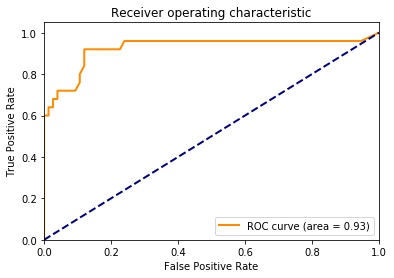

Graph Thresholds for Decission Tree


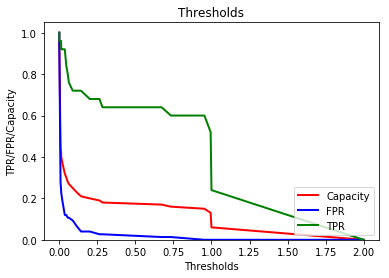

Graph ROC Curve for KNN


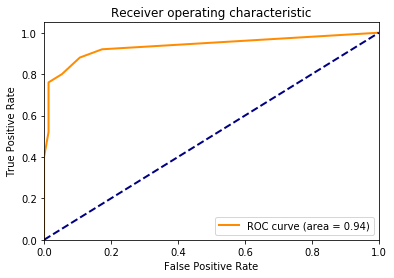

Graph Thresholds for KNN


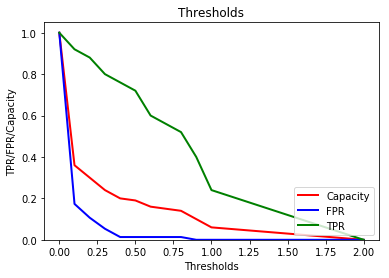

In [10]:
# ****************************************** TO DO **********************************************
# Train and evaluate at least 3 different models (different algorithms).
# For the evaluation use the bin_class_metrics function implemented in the previous step, which
# should print the different metrics as well as their visualization.
# ***********************************************************************************************

# Instantiate the classifier
clf_LR = lr(random_state=0,solver='lbfgs',max_iter=1000)
clf_DT = DecisionTreeClassifier(random_state=0,max_depth=10, min_samples_leaf=1)
clf_KNN = KNeighborsClassifier(n_neighbors=10)
    
# Train the classifier with .fit

                  
clf_LR.fit(x_train,y_train)
clf_DT.fit(x_train,y_train)
clf_KNN.fit(x_train,y_train)

# Generate y_pred with .predict

y_pred_LR = clf_LR.predict(x_test)
y_pred_DT = clf_DT.predict(x_test)
y_pred_KNN = clf_KNN.predict(x_test)

# Generate y_score with get_y_score
"""
def get_y_score(classifier, X_test, y_pred):            
"""
y_score_LR = get_y_score(clf_LR,x_test,y_pred_LR)
y_score_DT = get_y_score(clf_DT,x_test,y_pred_DT)
y_score_KNN = get_y_score(clf_KNN,x_test,y_pred_KNN)


predictions_LR = {'y_pred' : y_pred_LR, 'y_score' : y_score_LR}
df_predictions_LR = pd.DataFrame.from_dict(predictions_LR)

predictions_DT = {'y_pred' : y_pred_DT, 'y_score' : y_score_DT}
df_predictions_DT = pd.DataFrame.from_dict(predictions_DT)

predictions_KNN = {'y_pred' : y_pred_KNN, 'y_score' : y_score_KNN}
df_predictions_KNN = pd.DataFrame.from_dict(predictions_KNN)

# Evaluate the model with bin_class_metrics
# Suggestion: replace MODEL by a meaningful model reference e.g. metrics_rfc, roc_rfc for Random Forest Classifier

metrics_LR, roc_LR = binary_class_metrics('Logistic Regression', y_test, df_predictions_LR.y_pred, df_predictions_LR.y_score)

metrics_DT, roc_DT = binary_class_metrics('Decission Tree', y_test, df_predictions_DT.y_pred, df_predictions_DT.y_score)

metrics_KNN, roc_KNN = binary_class_metrics('KNN', y_test, df_predictions_KNN.y_pred, df_predictions_KNN.y_score)


In [93]:
# ****************************************** TO DO **********************************************
#Compare all models. Suggestion: use pandas concat to merge the metrics (dataframes) from each #model. 
#***********************************************************************************************

metrics_bn = pd.concat([metrics_LR,metrics_DT,metrics_KNN], axis=1,sort=True)
metrics_bn


,Logistic Regression,Decission Tree,KNN
Accuracy,0.910000,0.900000,0.890000
F1 Score,0.780488,0.761905,0.731707
Precision,1.000000,0.941176,0.937500
ROC AUC,0.980267,0.926133,0.935733
Recall,0.640000,0.640000,0.600000


Graph All Together Now


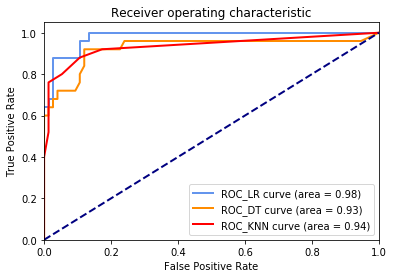

In [94]:
# ****************************************** TO DO **********************************************
# Plot AUC-ROC for the different models together in one plot
# ***********************************************************************************************

print('Graph All Together Now')
plt.figure()
lw = 2
plt.plot(roc_LR.FPR, roc_LR.TPR, color='cornflowerblue',
     lw=lw, label='ROC_LR curve (area = %0.2f)' % metrics_LR.iloc[4])
plt.plot(roc_DT.FPR, roc_DT.TPR, color='darkorange',
     lw=lw, label='ROC_DT curve (area = %0.2f)' % metrics_DT.iloc[4])
plt.plot(roc_KNN.FPR, roc_KNN.TPR, color='red',
     lw=lw, label='ROC_KNN curve (area = %0.2f)' % metrics_KNN.iloc[4])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## Expected Value Calculation:

Main objectives:
* Translate our metrics into added value for a business application
* Identify a cost-benefit matrix
* Combine a confusion matrix with a cost-benefit matrix to calculate the expected value

#### What is Expected Value?
Expected Value associates probabilities for the confusion matrix with values, representing the expected outcome of the model if it is adopted for a given business application.

It can be defined mathematically as:

$EV = \sum p(o_x) * v(o_x)$

where:

$EV$: Expected Value  
$p(o_x)$: Probability of observation x occurring  
$v(o_x)$: The value of observation x occuring

From the initial confusion matrix, we find each probability to obtain:
$\begin{bmatrix}TN & FP\\FN & TP\end{bmatrix}$ → $\begin{bmatrix}p(TN) & p(FP)\\p(FN) & p(TP)\end{bmatrix}$

Then, the cost-benefit matrix can be represented as:

$\begin{bmatrix}b(TN) & c(FP)\\c(FN) & b(TP)\end{bmatrix}$

where:

$b$ represents benefit (the benefits of accurately predicting positives and negatives)   
$c$ represents cost (the costs of misclassifying positives and negatives).

By associating benefits to positive values and costs to be negative values the following matrix is obtained:

$\begin{bmatrix}v(TN) & -v(FP)\\-v(FN) & v(TP)\end{bmatrix}$

The probabilities are then multiplied by the corresponding cost-benefit resulting in the Expected Value. To simplify, Expected Value can be obtained from the following formula:

$ EV = P(+v) * (TPR * b(TP) + FNR * c(FN)) + P(-v) * (TNR * b(TN) + FPR * c(FP))$

---

Typically, the cost-benefit matrix should be defined by domain experts. For the problem at hand, consider the following:
* **True Positive (TP)** has *benefit* of **EUR 400K**: equipment that will fail within the time window and is correctly selected by the model for maintenance.
* **True Negative (TN)** has *benefit* of **EUR 0K**: healthy equipment not selected by the model, no unnecessary maintenance costs are incurred.
* **False Positive (FP)** has *cost* of **EUR -150K**: equipment that is healthy but is flagged by the model for (unnecessary) maintenance.
* **False Negative (FN)** has *cost* of **EUR -450K**: equipment that will fail but is not flagged by the model, thus possibly resulting in a breakdown event.
* No. of positive class instances in the test data = 25 → $P(+v)$ = 0.25
* No. of negative class instances in the test data = 75 → $P(-v)$ = 0.75

This results in the following cost-benefit matrix:

$\begin{bmatrix}+0K & -150K\\-450K & +400K\end{bmatrix}$

In [95]:
# Auxiliary values for the cost-benefit analysis
TPb = 400
TNb = 0
FPc = -150
FNc = -450
prob_positive = 0.25 
prob_negative = 0.75

In [96]:
# ****************************************** TO DO **********************************************
# Calculate the max expected value for each model using roc dataframes created during model training
# ***********************************************************************************************
#result [0]-TN   [1]-FP   [2]-FN  [3]-TP
#cm_LR = roc_LR.iloc[0][4:8]
#cm_DT = roc_DT.iloc[0][4:8]
#cm_KNN = roc_KNN.iloc[0][4:8]

#𝑃(+𝑣)∗(𝑇𝑃𝑅∗𝑏(𝑇𝑃)+𝐹𝑁𝑅∗𝑐(𝐹𝑁))+𝑃(−𝑣)∗(𝑇𝑁𝑅∗𝑏(𝑇𝑁)+𝐹𝑃𝑅∗𝑐(𝐹𝑃))
#result [0]-TN   [1]-FP   [2]-FN  [3]-TP
roc_LR['EV']=prob_positive*(roc_LR['TPR']*TPb+roc_LR['FNR']*FNc)+prob_negative*(roc_LR['TNR']*TNb+roc_LR['FPR']*FPc)
roc_DT['EV']=prob_positive*(roc_DT['TPR']*TPb+roc_DT['FNR']*FNc)+prob_negative*(roc_DT['TNR']*TNb+roc_DT['FPR']*FPc)
roc_KNN['EV']=prob_positive*(roc_KNN['TPR']*TPb+roc_KNN['FNR']*FNc)+prob_negative*(roc_KNN['TNR']*TNb+roc_KNN['FPR']*FPc)



#EV_ALL_CLF=pd.concat([EV_LR,roc_LR['Threshold'],roc_LR['TN'],roc_LR['FN'],roc_LR['TP'],roc_LR['FP'],EV_DT,roc_DT['Threshold'],roc_DT['TN'],roc_DT['FN'],roc_DT['TP'],roc_DT['FP'],EV_KNN,roc_KNN['Threshold'],roc_KNN['TN'],roc_KNN['FN'],roc_KNN['TP'],roc_KNN['FP']], keys=['LR','LR_Th','LR_TN','LR_FN','LR_TP','LR_FP' ,'DT','DT_Th','DT_TN','DT_FN','DT_TP','DT_FP','KNN','KNN_Th','KNN_TN','KNN_FN','KNN_TP'],axis=1,sort=True)
#EV_ALL_CLF=pd.concat([roc_LR,roc_DT,roc_KNN], keys=['LR','DT','KNN'],axis=1,sort=True)
#EV_ALL_CLF = roc_LR + roc_DT + roc_KNN

EV_MAX_LR= roc_LR[roc_LR['EV']==roc_LR['EV'].max()]
EV_MAX_DT = roc_DT[roc_DT['EV']==roc_DT['EV'].max()]
EV_MAX_KNN =roc_KNN[roc_KNN['EV']==roc_KNN['EV'].max()]
EV_MAX_Table= pd.concat([EV_MAX_LR,EV_MAX_DT,EV_MAX_KNN])

# EV model capacity th tp fp tn fn tpr fpr 

EV_MAX_Table


,Threshold,TPR,FPR,Capacity,TN,FP,FN,TP,TNR,FNR,Model,EV
10,0.034484,1.00,0.133333,0.35,65.0,10.0,0.0,25.0,0.866667,0.00,Logistic Regression,85.0
15,0.036145,0.92,0.120000,0.32,66.0,9.0,2.0,23.0,0.880000,0.08,Decission Tree,69.5
9,0.100000,0.92,0.173333,0.36,62.0,13.0,2.0,23.0,0.826667,0.08,KNN,63.5


### Discussion of Results (Classification Summary):

* -The best classifier in this test was Logistic Regression with the following parameters
lr(random_state=0,solver='lbfgs',max_iter=1000)
* -This model provided the best profit of 85k  has shown above, when 35% of the machines need maintenance
* -Decision Tree had better maintenace % and better TN and FP but the worst FN values that was the what costed more money, so the end profit was less than Logistic Regreession model
* -K-Nearest Neighbours had the worst maintenance %, TN,FP,FN and TP so the end profit was less than the others because it had a greater value for FN and FP 



### Model Persistence - Saving the Best Model

Refer to the [Model Persistence](https://scikit-learn.org/stable/modules/model_persistence.html) example from the Scikit-Learn documentation using joblib.

In [61]:
# ****************************************** TO DO **********************************************
# Persist (save) the best model to the disk. It will be later used by the REST API server. 
# ***********************************************************************************************
#save best from df 
clf=clf_LR
dump(clf, 'best_clf.joblib') 


['best_clf.joblib']

# BONUS FEATUES